# Introduction 
This project aims to analyze the sentiment of user-generated text reviews and classify them as either positive or negative.
We applied Natural Language Processing (NLP) techniques such as text cleaning, lemmatization, and vectorization using TF-IDF to convert raw text into numerical features.
A Logistic Regression model was then trained on the processed data to predict the sentiment with high accuracy.

This project demonstrates how machine learning can be used to extract insights from text data, which is highly valuable in areas like customer feedback analysis, product review classification, and social media monitoring.

by : Kyrollos Ashraf

# Task 1: Upload and Explore data 
It has two columns:

review: text

sentiment: positive or negative

In [35]:
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
print(df.shape)
df.head()

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment'>

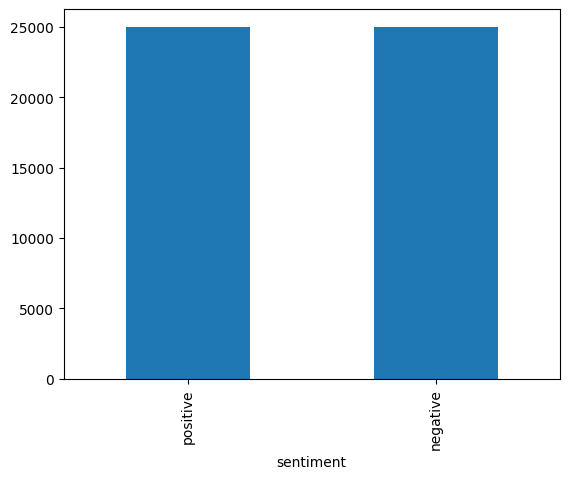

In [4]:
df['sentiment'].value_counts().plot(kind="bar")

# Task 2: Clean up the texts
Remove Symbols - HTML tags

Convert to Lowercase

Remove Stopwords :  "the", "is", "in", "on", "and". Before stopwords removal: "This movie is one of the best I have ever seen"
After stopwords removal:   "movie one best ever seen"


Choose: Lemmatization or Stemming
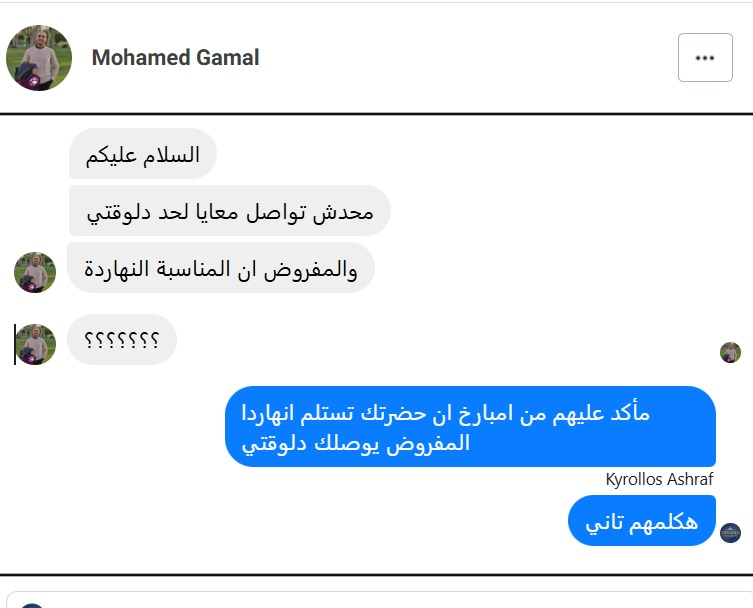

In [5]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


re → for processing text using Regular Expressions

string → for handling punctuation

nltk → a powerful natural language library

stopwords → a list of useless words

WordNetLemmatizer → a tool that restores words to their original form

In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [20]:
text= "I am YOUR: SON ,hany /*?> "

text = re.sub(r'<.*?>', '', text)
text = text.translate(str.maketrans('', '', string.punctuation))
text = text.lower()
words = text.split()
cleaned = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
print(words)
print(cleaned)
" ".join(cleaned)

['i', 'am', 'your', 'son', 'hany']
['son', 'hany']


'son hany'

In [21]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Lowercase all text
    text = text.lower()

    # Split into words
    words = text.split()

    # Remove stopwords and apply lemmatization
    cleaned = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join back to string
    return " ".join(cleaned)

In [48]:
df['cleaned_review'] = df['review'].apply(clean_text)
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode y...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


# Task 3: Vectorization 
Convert texts to numbers  -  TF-IDF

Take the 5,000 most common words in the dataset and create vectors based on them (so the vector doesn't get too large).

It learns all the words we have (fit), and then transforms each sentence into numbers.


Encoder : positive = 1 , negative = 0

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF

# Create the vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # تاخد أهم 5000 كلمة فقط

# Fit and transform the cleaned reviews
X = vectorizer.fit_transform(df['cleaned_review'])

In [50]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])  # 0 or 1

In [51]:
df.shape

(50000, 3)

# Task 4: Train the ML model

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression

model= LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Task 5: Evaluation

In [54]:
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [55]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.886

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



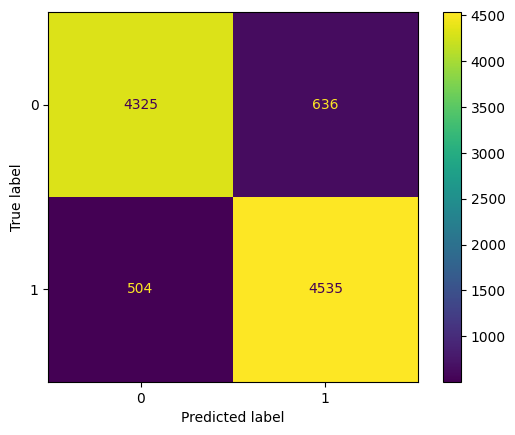

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

### For Now 
✔ We cleaned the texts (preprocessing)

✔ We converted words to numbers using TF-IDF

✔ We prepared the labels using LabelEncoder

✔ We trained an ML model (e.g., Logistic Regression)

✔ We evaluated the performance (accuracy + classification report)


# Task 6: Test the model on new reviews.

In [88]:
text = " I loved this movie %% "
cleaned = clean_text(text)
vec = vectorizer.transform([cleaned])
print(model.predict(vec))

[1]


# Task 7: Save the Model

In [ ]:
import pickle

# حفظ الموديل
with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# حفظ vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
